<a href="https://colab.research.google.com/github/YesenniaP/introducci-n-github/blob/main/Prediccion_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Proytecto 1

#Predicción de ventas


In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
filename ="/content/drive/MyDrive/Data Science/datos/sales_predictions.csv"
df = pd.read_csv(filename)
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#1) ¿Cuántas filas y columnas?

df.shape



(8523, 12)

R/Hay 12 columnas y 8523 filas. 

In [5]:
#2) ¿Cuáles son los tipos de datos en cada variable?

df.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

R/ Tenemos variables tipo objeto y float

In [6]:
#3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.
df.duplicated().sum()


0

R/En este data frame no se encuentran duplicados.

In [7]:
#4) Identifiquen los valores faltantes.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


R/ Las columnas a las que le falta datos son Item_Weight y Outlet_Size

In [8]:
#5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

df1 = df.drop(columns=["Outlet_Size","Item_Weight"])

#R/considero pertinente eliminar las columnas "Outlet_Size" y "Item_Weight" dado que no encuentro utilidad de analisis para prediccion de ventas 




In [9]:
#6) Confirmen que no hay valores faltantes después de abordarlos.
df1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 666.0+ KB


Con se puede ver en el codigo anterior ya no se encuentran datos faltantes, dado que se decidió en el item 5, eliminar las columnas donde se encontraban los datos faltantes 

In [10]:
#7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

df1["Item_Fat_Content"] = df1["Item_Fat_Content"].replace({"LF":"low fat","reg":"regular"})
df1["Item_Fat_Content"] = df1["Item_Fat_Content"].str.title()
df1["Item_Fat_Content"].unique()



array(['Low Fat', 'Regular'], dtype=object)

En el código anterior, reemplacé las abreviaturas con la palabra completa y luego puse cada letra inicial en mayuscala, para dar como resultado solo 2 variables totales. 

In [11]:
#8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)
df1.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


Text(0, 0.5, 'Count')

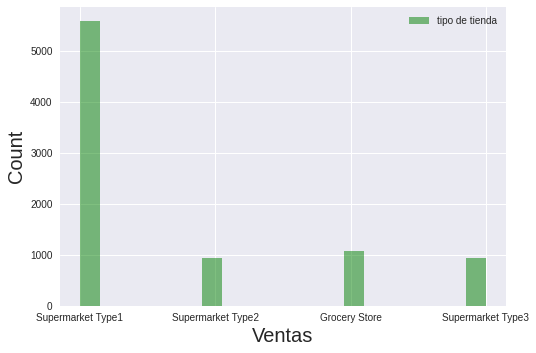

In [12]:
plt.style.use('seaborn')
df1["Outlet_Type"].hist(bins=20, 
                    color="green", 
                    label = "tipo de tienda", 
                    alpha = .5)

plt.legend()
plt.xlabel("Ventas", fontsize=20)
plt.ylabel("Count", fontsize =20)

#ECon este histograma, podemos ver que en el supermercado tipo 1 hay mayor concentración de datos, ahora abien, 
#no se puede determinar si esto es porque presenta mas ventas y por ende mayor ganancias, o es porque es el tipo de tiendas mas frecuente en el data frame



<function matplotlib.pyplot.show(*args, **kw)>

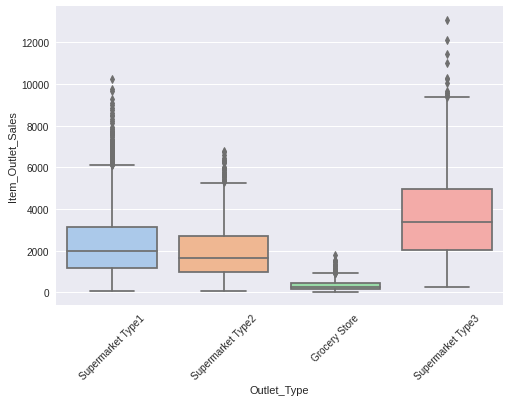

In [13]:

sns.boxplot(data=df1, x="Outlet_Type", y="Item_Outlet_Sales", palette="pastel")
plt.xticks(rotation = 45)
plt.show

#Con este grafico se puede observar que Supermarket type 3 es el tipo de tienda que mas ganancia de ventas tiene y que grocery store es donde menos se regristra ventas. 
#si comparamos con lo que se pudo observar con el histograma en el punto anterior, se puede concluir que supermarket type 1 no es el tipo de tiendan que mas vende
#pero si es el que mas datos concentrados tiene. 
#Tambien se podria concluir con este tipo de visualización que existen mucho datos outliers, seria importante realizar un analisis del cual es el producto que mas
#vende en cada tipo de tienda



Text(0.5, 1.0, 'Grocery Store')

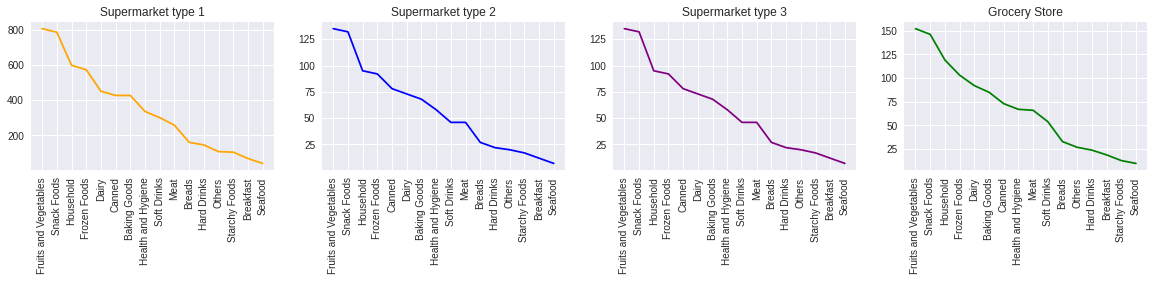

In [14]:
supermark1= df[df["Outlet_Type"]=="Supermarket Type1"]
serie1= supermark1["Item_Type"].value_counts()

supermark2= df[df["Outlet_Type"]=="Supermarket Type2"]
serie2= supermark2["Item_Type"].value_counts()

supermark3= df[df["Outlet_Type"]=="Supermarket Type3"]
serie3= supermark2["Item_Type"].value_counts()

grocery= df[df["Outlet_Type"]=="Grocery Store"]
serie4= grocery["Item_Type"].value_counts()

fig = plt.figure(figsize=(20, 6))

plt.subplot(2,4,1);

plt.plot(serie1[:], color="orange")
plt.xticks(rotation=90)
plt.title("Supermarket type 1")

plt.subplot(2,4,2);

plt.plot(serie2[:], color="blue")
plt.xticks(rotation=90)
plt.title("Supermarket type 2")

plt.subplot(2,4,3);

plt.plot(serie3[:], color="purple")
plt.xticks(rotation=90)
plt.title("Supermarket type 3")

plt.subplot(2,4,4);
plt.plot(serie4[:], color="green")
plt.xticks(rotation=90)
plt.title("Grocery Store")





In [15]:
#Se puede observar en la gráfica anterior como todos las tiendas sin importar el tipo lo que mas se vende son las frutas y verduras, y lo que menos se vende es la comida de mar. 
#Tambien podemos observar que la tienda que mas vende cada uno de los prodcutos es el supermercado tipo 1 
#El supermercado tipo 2 y tipo 3 tienden a vender en igual cantidad cada uno de los productos que se ofrece
#Si comparamos los resultados de este gáfico con el anterior (boxplot) podemos ver como a pesar de que el supermercado tipo 1 sea el que mas venda cada producto, no es el que mas genera ganancia de ventas
#sino que este lo hace el supermercado tipo 3. Seria importante saber cual es valor en cada tipo de tienda para cada producto, sin embargo dicha variable no se encuentra en nuestro data frame. 

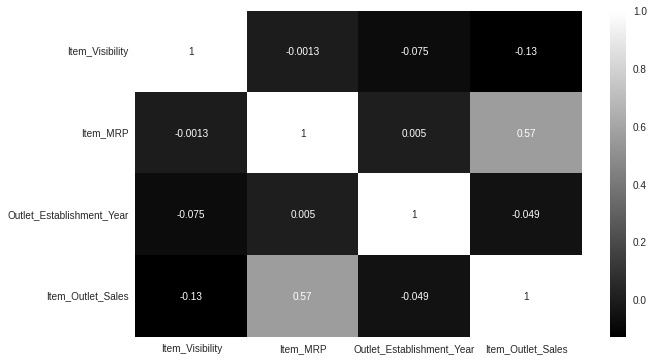

In [81]:
corr = df1.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, cmap = "gray", annot=True)
plt.show()

#La correlación que hay entre el precio maximo de venta de un producto al publico y las ventas del producto en una tienda particular es moderada de forma positiva

Se importará las bibliotecas necesarias para preparar el data frame para un aprendizaje automático. 

In [17]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import set_config
set_config(display='diagram')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Se regresará al conjunto de datos original con el objetivo de evitar una fuga de datos.  

In [18]:
filename ="/content/drive/MyDrive/Data Science/datos/sales_predictions.csv"
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [19]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"LF":"low fat","reg":"regular"})
df["Item_Fat_Content"] = df["Item_Fat_Content"].str.title()
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

Al traer nuevamente el data frame original, los cambios antes establecidos no se mantuvieron, por lo cual, consideré pertinente volver a corregir la categoría que presentaba inconsistencia de datos, antes de preparar el data para un aprendizaje automático.  

Nota: Si imputaron los valores faltantes basados en un cálculo en todo el conjunto de datos (como la media), ahora deben realizar ese paso después de hacer train test split usando SimpleImputer. 

1. Identifiquen el objetivo (X) y las características (y): Asignen la columna "Item_Outlet_Sales" como el objetivo y el resto de las variables relevantes como el matriz de características. 

In [20]:
y = df["Item_Outlet_Sales"]
X = df.drop(columns="Item_Outlet_Sales")

Como la columna objetivo es "Item_Outlet_Sales" esta se asignó a la variable y, y las demas columnas seran la matriz para predecir las ventas de productos en dichas tiendas.  

2. Realicen un train test split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,NCG06,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,FDV57,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,FDM27,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,FDG24,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,FDD05,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,NaN,Tier 2,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
5734,FDY08,9.395,Regular,0.286345,Fruits and Vegetables,139.1838,OUT010,1998,NaN,Tier 3,Grocery Store
5191,FDC41,15.600,Low Fat,0.117575,Frozen Foods,75.6670,OUT017,2007,NaN,Tier 2,Supermarket Type1
5390,NCQ53,17.600,Low Fat,0.018944,Health and Hygiene,237.3590,OUT045,2002,NaN,Tier 2,Supermarket Type1
860,FDL46,20.350,Low Fat,0.054363,Snack Foods,117.9466,OUT017,2007,NaN,Tier 2,Supermarket Type1


Como se puede observar, el dataframe se dividió en un data de prueba y otro de entrenamiento, en la variable X que es la matriz no se encuentra la columna objetivo, la cual con el item anterior se elimino del data y se creo una variable aparte con los datos llamada y. 

3. Creen un pipeline de preprocesamiento para preparar el conjunto de datos para el aprendizaje automático.

Antes de empezar a realizar un pipeline, se inspeccionará los datos. 

In [22]:
print(X.info(), '\n')
print(X.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 732.6+ KB
None 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content          

Se puede observar este data frame tenemos las siguientes categorias: 
- Numéricas: Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year
- Categóricas: 
  - Ordinales: Outlet_Size, Item_Fat_Content
  - Nominales: Item_Identifier, Item_Type, Outlet_Identifier, Outlet_Location_Type, Outlet_Type

A las columnas Item_Weight y Outlet_Size le faltan datos. Dichos datos faltantes se los cuales seran imputados en caso de la categoría numérica con la media y en la categoria ordinal con most_frequent. 

Ahos bien para facilitar el preprocesamiento, se transformará la categoria nominal a datos numéricos. 

In [23]:
df["Outlet_Size"].unique()
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [24]:
#fat = {'Low Fat': 0, 'Regular': 1}
#sizes = {'Small': 0, 'Medium': 1, 'High': 2}

#X_train.replace({'Outlet_Size': sizes,'Item_Fat_Content':fat},inplace=True)
#X_test.replace({'Outlet_Size': sizes,'Item_Fat_Content':fat},inplace=True)
#X_train.head()


Entonces, los pasos a seguir para realizar todos los cambios pertinentes para dejar el data frame listo para un aprendizaje automatico será: 

1. Realizar selectores de categorias numéricas y categóricas 
2. Instanciar transformadores: 
   - Hacer imputados en los valores faltantes
   - Transformar columnas categoricas ordinales y nominales 
   - Escalonar las categorias numéricas 
3. Instanciar pipelines
4. Instanciar ColumnTransformer
5. Transformar datos  
6. Inspeccionar el resultado


1. Selectores numéricos y categóricos

In [25]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

2. Instanciar transformadores

In [26]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)






3. Instanciar pipelines

In [27]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [28]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

4. Instanciar ColumnTransformer

In [29]:
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fdd78367370>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fdd78373d90>)])

In [30]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fdd78367370>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fdd78373d90>)])

In [31]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [32]:
# Comprueben los valores faltantes y que los datos se escalen y tengan una codificación one-hot
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 1592)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

Ahora para este conjunto de datos deberán:

1. Crear un modelo de regresión lineal para predecir las ventas.

- Evalúen el rendimiento del modelo basándose en r^2.
- Evalúen el rendimiento del modelo basándose en RECM.

2. rear un modelo de árbol de regresión para predecir las ventas.

- Comparen el rendimiento del modelo basándose en r^2.
- Comparen el rendimiento del modelo basándose en RECM.  

3. Acaban de intentar 2 diferentes modelos en el conjunto de datos. Deben determinar qué modelo implementar.

En general, ¿qué modelo recomiendan?
Justifiquen su recomendación.

**Regresión lineal**

In [33]:
#Se hace una instancia del modelo
reg = LinearRegression()

In [34]:
#entrenamiento del modelo 
reg.fit(X_train_processed,y_train)

LinearRegression()

In [71]:
#Se realiza las predicciones en el conjunto de datos 
train_preds_reg = reg.predict(X_train_processed)
test_preds_reg = reg.predict(X_test_processed)

In [72]:
# Obtengan las predicciones del conjunto de entrenamiento
train_preds = reg.predict(X_train_processed)
# Obtengan las predicciones del conjunto de prueba
test_preds = reg.predict(X_test_processed)

In [59]:
#Se evalua el modelo 

#R2

train_score_r2 = reg.score(X_train_processed, y_train)
test_score_r2 = reg.score(X_test_processed, y_test)

print("Valor de métrica R2 en el conjunto de entrenamiento es:",train_score_r2)
print("Valor de métrica R2 en el conjunto de prueba es:",test_score_r2)

Valor de métrica R2 en el conjunto de entrenamiento es: 0.6714378167544087
Valor de métrica R2 en el conjunto de prueba es: -1.6575880497968222e+19


In [73]:
#RECM

rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

print(f"Valor de métrica RECM en el conjunto de entrenamiento es: {rmse_train}")
print(f"Valor de métrica RECM en el conjunto de prueba es:{rmse_test}")

Valor de métrica RECM en el conjunto de entrenamiento es: 986.0858114271118
Valor de métrica RECM en el conjunto de prueba es:6762579228318.999


**Árbol de regresión**

In [54]:
#instanciar el modelo
dec_tree = DecisionTreeRegressor(random_state = 42)

In [55]:
#aplicar el modelo
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [56]:
#predecir el modelo
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

In [74]:
#evaluar el modelo R2
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

0.9999999773162773
0.23571621123237974


Podemos observar que el modelo esta sobreajustado por lo cual se hallará cual es el valor de depth y cual seria el ideal para evitar el sobreajuste

In [60]:
dec_tree.get_depth()

60

In [62]:
# Lista de valores a probar para max_depth:
max_depth_range = list(range(2, 60))# 
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

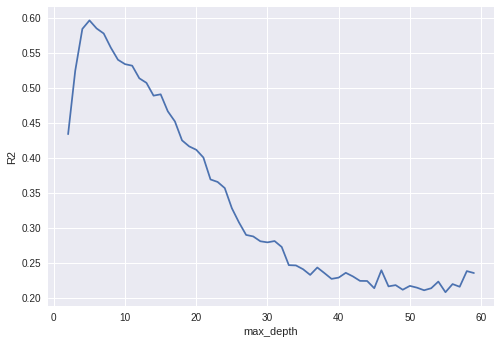

In [63]:
# Visualicen qué max_depth lleva a una puntuación R2 más alta
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

El numero optimo de depth está mas o menos 4, asi que se ejecutará de nuevo el modelo haciendo este ajuste. 

In [79]:
#nuevo modelo ajustado
dec_tree_2 = DecisionTreeRegressor(max_depth = 4, random_state = 42)
dec_tree_2.fit(X_train_processed, y_train)
train_2_score = dec_tree_2.score(X_train_processed, y_train)
test_2_score = dec_tree_2.score(X_test_processed, y_test)

print("Valor de métrica R2 en el conjunto de entrenamiento ajustado es:", train_2_score)
print("Valor de métrica R2 en el conjunto de prueba ajustado es:", test_2_score)

Valor de métrica R2 en el conjunto de entrenamiento ajustado es: 0.5827053939473481
Valor de métrica R2 en el conjunto de prueba ajustado es: 0.5839367270114887


Podemos ver que en este modelo ajustado ya no existe el sobreajuste. 

Ahora terminaremos de evaluar el modelo con RECM con los datos ajustados. 

In [80]:
#RECM

train_preds = dec_tree_2.predict(X_train_processed)
test_preds = dec_tree_2.predict(X_test_processed)

rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

print(f"Valor de métrica RECM en el conjunto de entrenamiento es: {rmse_train}")
print(f"Valor de métrica RECM en el conjunto de prueba es:{rmse_test}")


Valor de métrica RECM en el conjunto de entrenamiento es: 1111.2897472534712
Valor de métrica RECM en el conjunto de prueba es:1071.4052083436045


**Conclusiones**

1. Al ejecutar los dos modelos, podemos observar que el modelo de regresion lineal arroja valores inconsistentes, por lo cual, no es modelo adecuado para este conjunto de datos. 
2. El modelo de árbol de desiciones, sobreajustó los datos lo que con llevo a que ubiera gran diferencia entre los datos de entrenamiento y los de prueba, sin embargo cuando se ajusta el modelo determinado el max de profofundidad, este sobreajuste se corrige, dando resultados favorables. 
3. Entre los dos modelos el mejor para este conjunto de datos, es el arbol de decisiones, ya que prediciendo los datos en el conjunto de entrenamiento y de prueba es mejor, incluso siendo en este modelo mejor en los de prueba.  